### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
primi_10 = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
primi_10


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
45,Czech Republic,361,170,134,11.8
61,France,127,151,370,11.8
141,Russian Federation,247,326,73,11.5
81,Ireland,313,118,165,11.4
155,Slovakia,196,293,116,11.4
99,Luxembourg,236,133,271,11.4


In [3]:
media_birra = df['beer_servings'].mean()
media_wine = df['wine_servings'].mean()
media_spirit = df['spirit_servings'].mean()
media_totale = (media_spirit + media_birra + media_wine)/3
media_totale

78.86873920552678

In [5]:
df['alcohol_index'] = df[['beer_servings', 'wine_servings','spirit_servings']].mean(axis=1)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,145.333333
189,Vietnam,111,2,1,2.0,38.000000
190,Yemen,6,0,0,0.1,2.000000
191,Zambia,32,19,4,2.5,18.333333


In [ ]:
indice_max = df['alcohol_index'].idxmax()
df['country'][indice_max],  df.loc[df['alcohol_index'].idxmax(),'country']

('Andorra', 'Andorra')

In [8]:
df[df['beer_servings'] > 100].country, df.loc[df['beer_servings'] > 100, 'country']

(3                Andorra
 4                 Angola
 5      Antigua & Barbuda
 6              Argentina
 8              Australia
              ...        
 182       United Kingdom
 184                  USA
 185              Uruguay
 188            Venezuela
 189              Vietnam
 Name: country, Length: 79, dtype: object,
 3                Andorra
 4                 Angola
 5      Antigua & Barbuda
 6              Argentina
 8              Australia
              ...        
 182       United Kingdom
 184                  USA
 185              Uruguay
 188            Venezuela
 189              Vietnam
 Name: country, Length: 79, dtype: object)

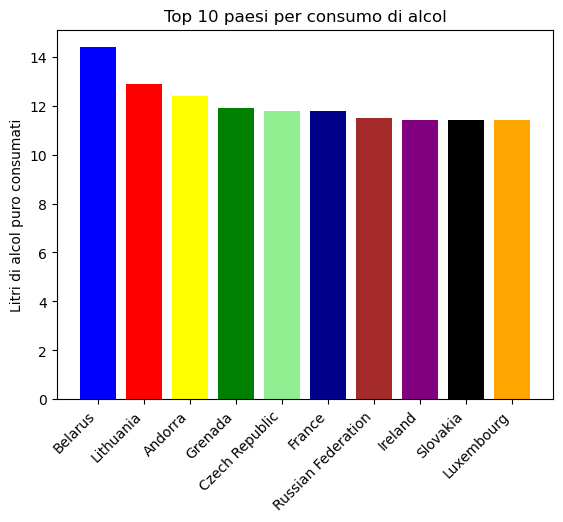

In [10]:
plt.bar(primi_10['country'],primi_10['total_litres_of_pure_alcohol'], 
        color=['blue','red','yellow','green','lightgreen','darkblue','brown','purple','black','orange'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Litri di alcol puro consumati")
plt.title("Top 10 paesi per consumo di alcol")
plt.show()

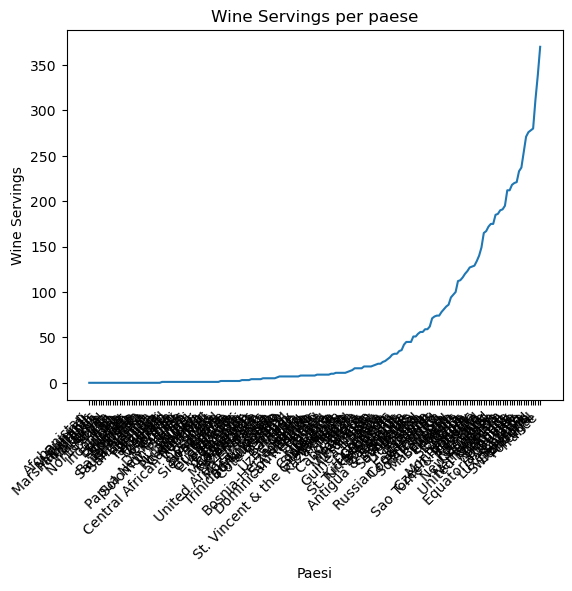

In [12]:
df_ordinato_wine = df.sort_values(by='wine_servings')
plt.plot(df_ordinato_wine['country'], df_ordinato_wine['wine_servings'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Paesi")
plt.ylabel("Wine Servings")
plt.title("Wine Servings per paese")
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [14]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [16]:
df_pulita = df.dropna(subset=['job_country','salary_year_avg'])
df_pulita

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [20]:
df_pulita_salary_year_avg = df_pulita.groupby('job_country').agg(
    avg_salary=('salary_year_avg','mean'),
    sum_salary=('salary_year_avg','sum'),
    count_salary=('salary_year_avg','count'),
    min_salary=('salary_year_avg','min'),
    max_salary=('salary_year_avg','max')
)
df_pulita_salary_year_avg

,avg_salary,sum_salary,count_salary,min_salary,max_salary
job_country,,,,,
Albania,79472.500000,397362.5,5,43200.0,157500.0
Algeria,44550.000000,89100.0,2,44100.0,45000.0
Argentina,105212.343750,3366795.0,32,45000.0,222000.0
Armenia,78757.000000,472542.0,6,45000.0,128682.0
Australia,118987.574324,8805080.5,74,20000.0,257500.0
...,...,...,...,...,...
Uruguay,69333.333333,208000.0,3,50000.0,100500.0
Uzbekistan,30750.000000,30750.0,1,30750.0,30750.0
Vietnam,90927.236364,5000998.0,55,28000.0,200000.0


In [22]:
df_pulita['job_country'].value_counts().sum()

22003

In [23]:
df_pulita.groupby('job_country')['salary_year_avg'].agg(['min','max'])

,min,max
job_country,,
Albania,43200.0,157500.0
Algeria,44100.0,45000.0
Argentina,45000.0,222000.0
Armenia,45000.0,128682.0
Australia,20000.0,257500.0
...,...,...
Uruguay,50000.0,100500.0
Uzbekistan,30750.0,30750.0
Vietnam,28000.0,200000.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Senior Data Scientist'),
  Text(0, 1, 'Senior Data Engineer'),
  Text(0, 2, 'Data Scientist'),
  Text(0, 3, 'Data Engineer'),
  Text(0, 4, 'Machine Learning Engineer'),
  Text(0, 5, 'Senior Data Analyst'),
  Text(0, 6, 'Software Engineer'),
  Text(0, 7, 'Cloud Engineer'),
  Text(0, 8, 'Data Analyst'),
  Text(0, 9, 'Business Analyst')])

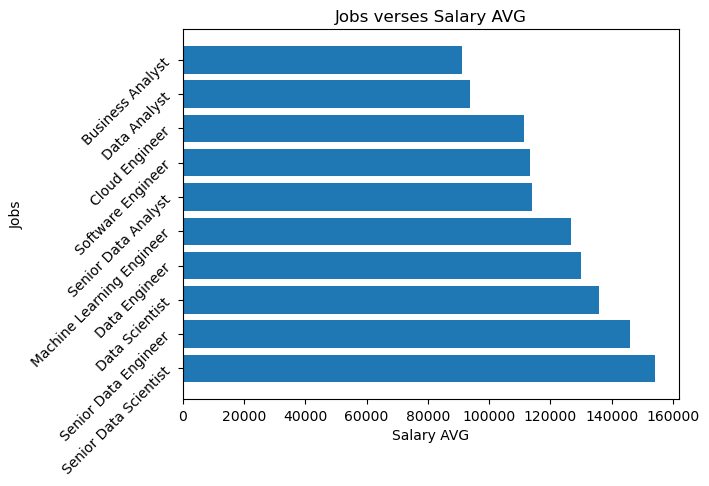

In [50]:
import matplotlib.pyplot as plt

df_gruppato = df.groupby('job_title_short')['salary_year_avg'].mean()
df_gruppato_ordinato = df_gruppato.sort_values(ascending=False)
plt.barh(df_gruppato_ordinato.index, df_gruppato_ordinato.values)
plt.title("Jobs verses Salary AVG")
plt.xlabel("Salary AVG")
plt.ylabel("Jobs")
plt.yticks(rotation=45, ha='right')